# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [33]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [35]:
%%R

# My commonly used R imports

require('tidyverse')

In [36]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,62,9
1,26,34
2,53,64
3,21,52
4,30,54


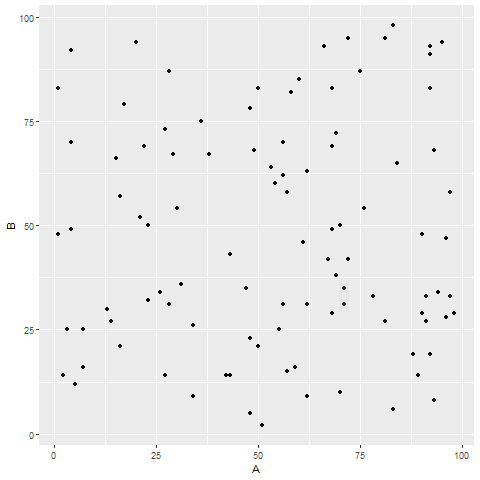

In [37]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [38]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(10)

# A tibble: 10 x 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 ~  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D~  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo~  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4


In [39]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




In [72]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)
to_plot

# A tibble: 192 x 3
   name          variable  value
   <chr>         <chr>     <dbl>
 1 Mazda RX4     mpg       21   
 2 Mazda RX4     disp     160   
 3 Mazda RX4     hp       110   
 4 Mazda RX4     drat       3.9 
 5 Mazda RX4     wt         2.62
 6 Mazda RX4     qsec      16.5 
 7 Mazda RX4 Wag mpg       21   
 8 Mazda RX4 Wag disp     160   
 9 Mazda RX4 Wag hp       110   
10 Mazda RX4 Wag drat       3.9 
# ... with 182 more rows
# i Use `print(n = ...)` to see more rows


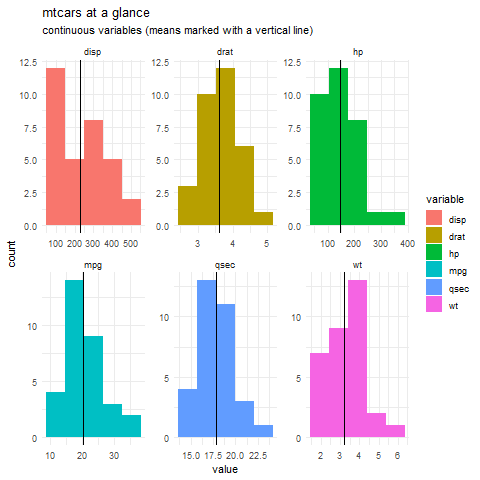

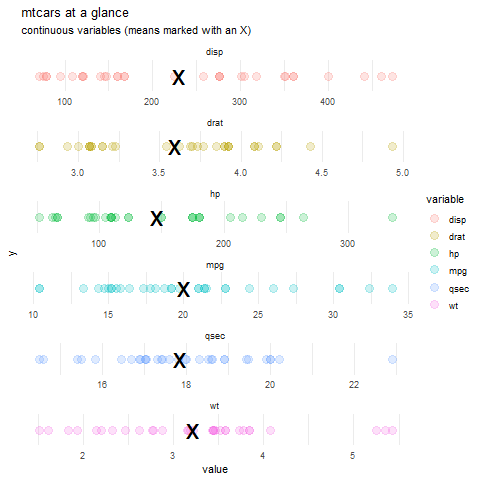

In [40]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

#plot_continuous

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

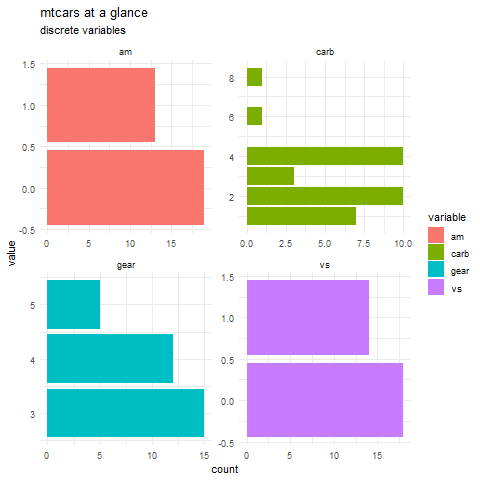

In [60]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

Central tendencies of the various characteristics or variables of the cars in the database. For example, the average number mpg, weight and qt, and how the numbers of carburators and gears are divided among the different cars. For exampled, most cars (15) have 3 gears, and there are more cars with manual than with automatic transmission among the cars in the database.

👉 What can we not conclude about this dataset from the charts above?

We don't know anything about the correlation (let alone causation) between various variables. Do what is the interplay between cars' weight and fuel economy or between cars' type of transmission and fuel economy. Do heavier cars have better fuel economy than lighter cars?

👉 What further questions about this data do you have now? 

How do I start to explore correlations between variables? Should outliers be excluded from the exploration? What is the best way to visualize the correlations?

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


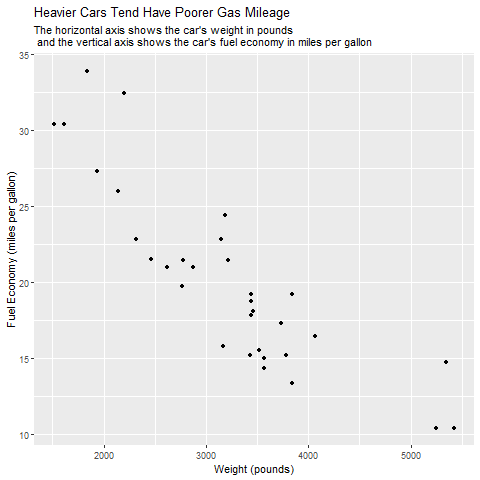

In [75]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt*1000) +
    geom_point() +
    labs(title = 'Heavier Cars Tend Have Poorer Gas Mileage',
            subtitle="The horizontal axis shows the car's weight in pounds\n and the vertical axis shows the car's fuel economy in miles per gallon",
            x = 'Weight (pounds)',
            y = 'Fuel Economy (miles per gallon)') 
    #theme_minimal(base_size = 14)

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    **There is a negative correlation between fuel efficiency and weight. The heavier the car, the lower the fuel efficiency.**

    b. What can't we conclude about fuel efficiency and weight

    **We can't conclude that cars heavier weight automatically results in lower fuel efficiency. It may be some other factor or variable that causes the correlation.**

    c. What further questions do you have about this data?

    **What is the correlation between fuel efficiency and other variables?**

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


The point of departure for exploration is to check for correlations between gas mileage and discrete_variables. Below is one example. Obviusly, writing a few lines code, that chart below can be faceted to display correlations between gas mileage and all the discrete variables. I made stabs at getting there, but failed.

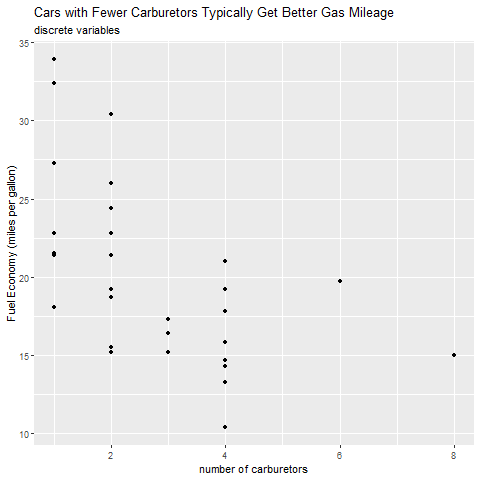

In [76]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=carb) +
    geom_point() +
    labs(title = 'Cars with Fewer Carburetors Typically Get Better Gas Mileage',
            subtitle='discrete variables',
            x = 'number of carburetors',
            y = 'Fuel Economy (miles per gallon)')

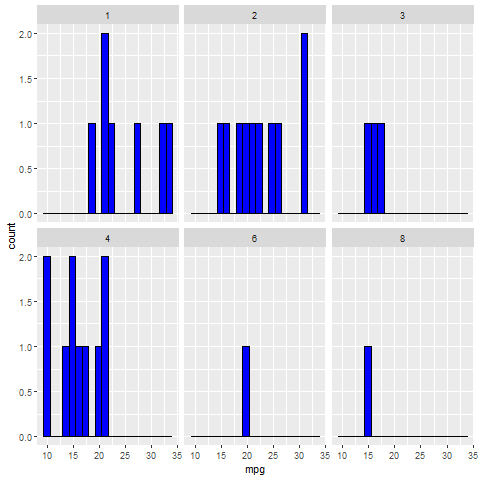

In [80]:
%%R

p <- ggplot(mtcars, aes(x = mpg)) + geom_histogram(bins = 20, color = 'black', fill = 'blue') 

# Add facets for each variable in the list
for (var in discrete_variables) {
  p <- p + facet_wrap(vars(get(var)))
}

# Display the plot
print(p)


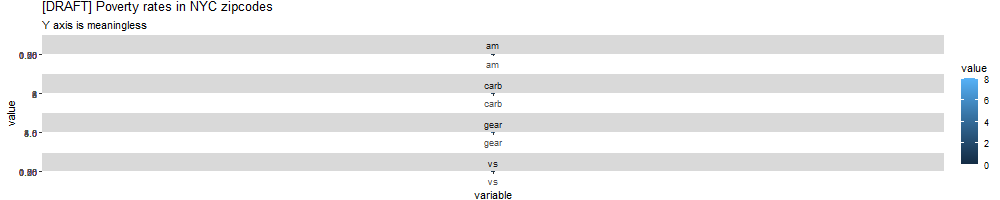

In [71]:
%%R -w 1000 -h 200

ggplot(to_plot) + 
    aes(x=variable, y=value, color=value) +
    geom_point() +
    theme(
    ) + labs(
        title = "Engine's Make-up Affects Fuel Economy", 
        subtitle = "something in here") +
    facet_wrap(~variable, scales='free', ncol=1)

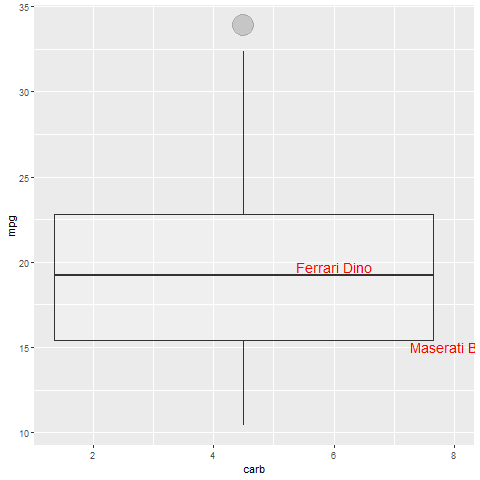

In [ ]:
%%R

outliers_df <- mtcars %>% 
    filter(carb > 4)

ggplot(mtcars) + 
    aes(y=mpg, x=carb) +
    geom_boxplot(alpha=.2,outlier.size=10) +
    geom_text(data=outliers_df, color="red", size=5, aes(label=name))

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: How does the type of transmission affect fuel efficiency?

For this, I found a chart that shows the correlation between transmission type and fuel efficiency.

### 👉 Charts or summary statistics to help answer your question

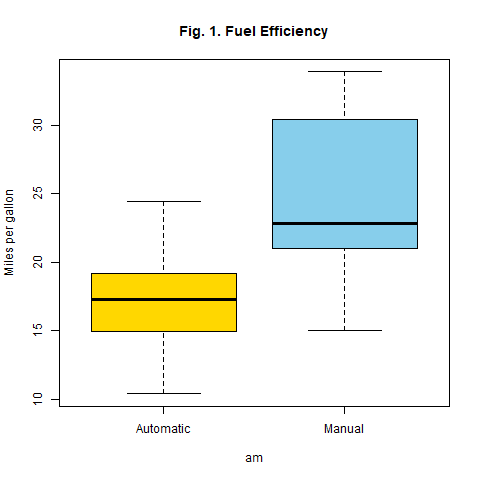

In [ ]:
%%R 

# ggplot code here%%R

boxplot(mpg~am, data=mtcars, main ='Fig. 1. Fuel Efficiency',
        ylab='Miles per gallon',names=c("Automatic","Manual"),notch=FALSE, col=(c("gold","skyblue")))

### 👉 Reflection

a. On average, cars with automatic transmission have much poorer fuel effieciency than cars with manual transmission. In fact, the boxplot shows the more than 75% of the cars (in the mtcars database) with automatic transmission have fuel efficiency below 20 mpg, while roughly only 25% of the cars with manual transmission have fuel efficiency below 20 mpg. It appears that a good portion of the cars with manual transsmission have gas mileage very close to the median mpg figure.

b. Again, this is a correlation for cars in the mtcars dataset. 

c. Is it possible to estalish so strong statistical link that in layman's terms we could make a claim that in barring some exceptions, having a automatic transmission increases fuel consumption.
